# YouTube Video Data Analysis
This notebook performs data cleaning, exploration, and visualization on a dataset of YouTube video statistics.

## 1. LOAD AND INSPECT THE DATASET
Load the data from "videos-stats.csv" into a pandas DataFrame.

In [9]:
import pandas as pd

try:
    df = pd.read_csv('videos-stats.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'videos-stats.csv' not found. Please ensure the file exists in the current directory or provide the correct path.")
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,Unnamed: 0,Title,Video ID,Published At,Keyword,Likes,Comments,Views
0,0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0
1,1,The most EXPENSIVE thing I own.,b3x28s61q3c,2022-08-24,tech,76779.0,4306.0,1758063.0
2,2,My New House Gaming Setup is SICK!,4mgePWWCAmA,2022-08-23,tech,63825.0,3338.0,1564007.0
3,3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,2022-08-23,tech,71566.0,1426.0,922918.0
4,4,Best Back to School Tech 2022!,ErMwWXQxHp0,2022-08-08,tech,96513.0,5155.0,1855644.0


# 2.DATA CLEANING
We convert date columns to datetime, drop rows with missing essential data, and remove duplicates.

In [10]:
# Convert 'Published At' to datetime
df['Published At'] = pd.to_datetime(df['Published At'], errors='coerce')

# Drop rows with missing essential data
df.dropna(subset=['Views', 'Likes', 'Comments'], inplace=True)

# Ensure numeric data types
df['Views'] = pd.to_numeric(df['Views'], errors='coerce')
df['Likes'] = pd.to_numeric(df['Likes'], errors='coerce')
df['Comments'] = pd.to_numeric(df['Comments'], errors='coerce')

# Drop duplicates
df.drop_duplicates(inplace=True)

# 3.DATA EXPLORATION
I need to explore the datasets structure, including its dimensions, data types, summary statistics, missing values, and unique values in categorical columns.

In [11]:
# Check the dimensions of the DataFrame.
print("DataFrame shape:", df.shape)

# Get a concise summary of the DataFrame, including data types.
print("\nDataFrame info:")
df.info()

# Generate descriptive statistics for numerical columns.
print("\nDescriptive statistics for numerical columns:")
display(df.describe())

# Explore categorical columns.
categorical_cols = ['Keyword']  # Add other categorical columns if needed
for col in categorical_cols:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())
    print(f"\nValue counts for '{col}':")
    display(df[col].value_counts())

# Identify columns with missing values.
print("\nMissing values per column:")
print(df.isnull().sum())

# Check data types and potential conversions
print("\nData types:")
print(df.dtypes)

DataFrame shape: (1879, 8)

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
Index: 1879 entries, 0 to 1878
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    1879 non-null   int64         
 1   Title         1879 non-null   object        
 2   Video ID      1879 non-null   object        
 3   Published At  1879 non-null   datetime64[ns]
 4   Keyword       1879 non-null   object        
 5   Likes         1879 non-null   float64       
 6   Comments      1879 non-null   float64       
 7   Views         1879 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 132.1+ KB

Descriptive statistics for numerical columns:


,Unnamed: 0,Published At,Likes,Comments,Views
count,1879.000000,1879,1.879000e+03,1879.000000,1.879000e+03
mean,939.000000,2021-06-04 04:28:13.666844160,1.700610e+05,7863.331559,1.161292e+07
min,0.000000,2007-07-16 00:00:00,-1.000000e+00,-1.000000,2.500000e+01
25%,469.500000,2021-02-17 12:00:00,2.672500e+03,199.000000,8.451500e+04
50%,939.000000,2022-06-15 00:00:00,1.478700e+04,814.000000,5.917210e+05
75%,1408.500000,2022-08-23 00:00:00,6.090600e+04,3377.500000,2.804978e+06
max,1878.000000,2022-08-24 00:00:00,1.644556e+07,732818.000000,4.034122e+09
std,542.564896,NaN,7.962293e+05,37879.964926,1.084450e+08



Unique values in 'Keyword':
['tech' 'news' 'gaming' 'sports' 'how-to' 'business' 'tutorial' 'finance'
 'crypto' 'cubes' 'chess' 'apple' 'google' 'interview' 'history'
 'literature' 'bed' 'trolling' 'asmr' 'music' 'food' 'mukbang' 'reaction'
 'lofi' 'animals' 'education' 'minecraft' 'sat' 'mrbeast' 'cnn'
 'mathchemistry' 'biology' 'physics' 'computer science' 'nintendo' 'xbox'
 'marvel' 'movies' 'data science' 'game development' 'machine learning']

Value counts for 'Keyword':


Keyword
minecraft           50
asmr                50
mrbeast             50
cnn                 50
history             50
interview           50
physics             50
reaction            50
cubes               50
crypto              50
tutorial            50
marvel              50
data science        50
game development    50
trolling            50
xbox                49
sat                 49
sports              49
tech                48
computer science    48
nintendo            48
food                48
machine learning    48
how-to              48
business            48
chess               47
biology             47
music               46
literature          46
google              45
movies              45
mukbang             45
bed                 44
gaming              43
apple               42
lofi                41
news                39
finance             39
animals             38
education           24
mathchemistry       15
Name: count, dtype: int64


Missing values per column:
Unnamed: 0      0
Title           0
Video ID        0
Published At    0
Keyword         0
Likes           0
Comments        0
Views           0
dtype: int64

Data types:
Unnamed: 0               int64
Title                   object
Video ID                object
Published At    datetime64[ns]
Keyword                 object
Likes                  float64
Comments               float64
Views                  float64
dtype: object


# 4. DATA ANALYSIS
Calculate basic statistics for 'Views', 'Likes', and 'Comments' after handling negative values and outliers. Then, explore correlations between these variables and visualize them using scatter plots. Finally, analyze the distributions of these variables using histograms.

Basic Statistics:
               Views          Likes      Comments
count  1.879000e+03    1879.000000   1879.000000
mean   3.993382e+06   79170.092177   3661.820224
std    8.319273e+06  155301.473887   6655.781438
min    2.500000e+01       0.000000      0.000000
25%    8.451500e+04    2672.500000    199.000000
50%    5.917210e+05   14787.000000    814.000000
75%    2.804978e+06   60906.000000   3377.500000
max    3.384973e+07  627427.800000  26733.800000

Correlation Matrix:
              Views     Likes  Comments
Views     1.000000  0.899668  0.793044
Likes     0.899668  1.000000  0.863362
Comments  0.793044  0.863362  1.000000


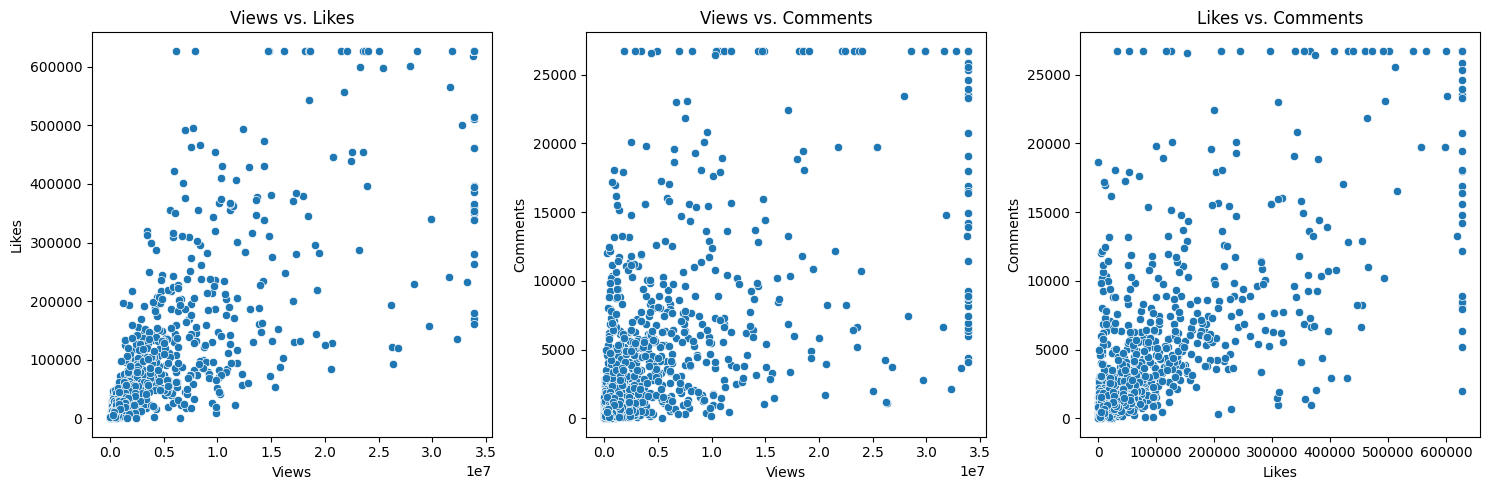

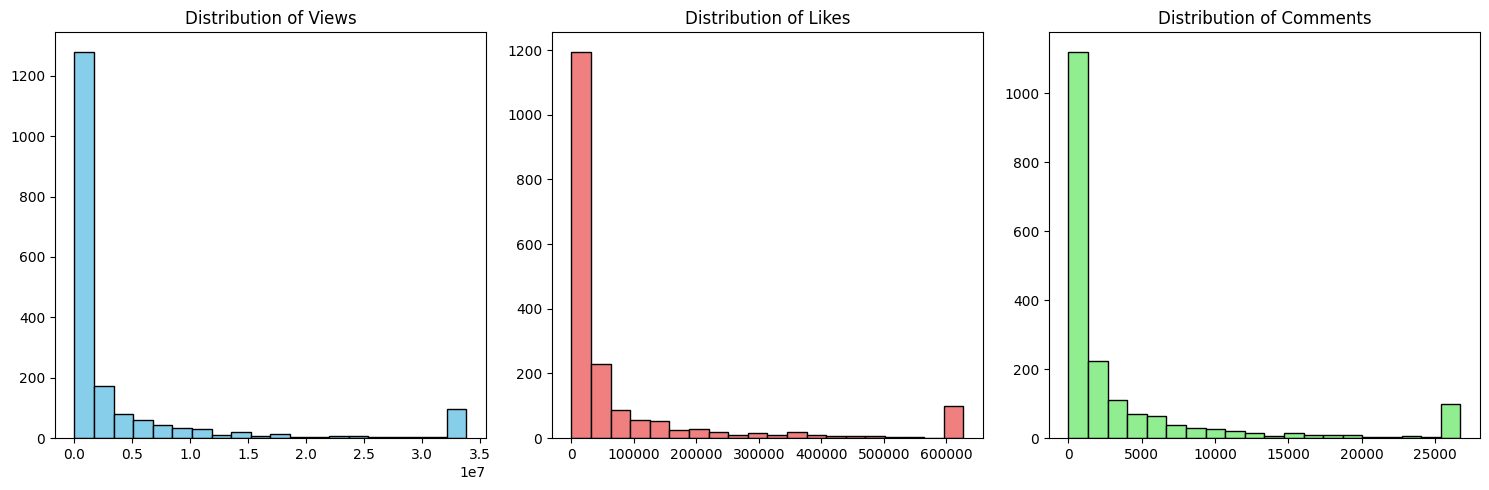

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Handle negative values and outliers (replace negative values with 0 and cap outliers at a reasonable percentile).
for col in ['Likes', 'Comments', 'Views']:
    df[col] = df[col].apply(lambda x: 0 if x < 0 else x)
    upper_limit = df[col].quantile(0.95) # Using 95th percentile as the upper limit for outliers
    df[col] = df[col].apply(lambda x: upper_limit if x > upper_limit else x)


# Calculate basic statistics
stats = df[['Views', 'Likes', 'Comments']].describe()
print("Basic Statistics:\n", stats)

# Explore correlations
correlation_matrix = df[['Views', 'Likes', 'Comments']].corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

# Visualize correlations with scatter plots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='Views', y='Likes', data=df)
plt.title('Views vs. Likes')

plt.subplot(1, 3, 2)
sns.scatterplot(x='Views', y='Comments', data=df)
plt.title('Views vs. Comments')

plt.subplot(1, 3, 3)
sns.scatterplot(x='Likes', y='Comments', data=df)
plt.title('Likes vs. Comments')

plt.tight_layout()
plt.show()

# Analyze distributions with histograms
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['Views'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Views')

plt.subplot(1, 3, 2)
plt.hist(df['Likes'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Distribution of Likes')

plt.subplot(1, 3, 3)
plt.hist(df['Comments'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Comments')

plt.tight_layout()
plt.show()

# 5.DATA VISULIZATION 
Visualize the data using histograms, scatter plots, and bar charts as per the instructions.

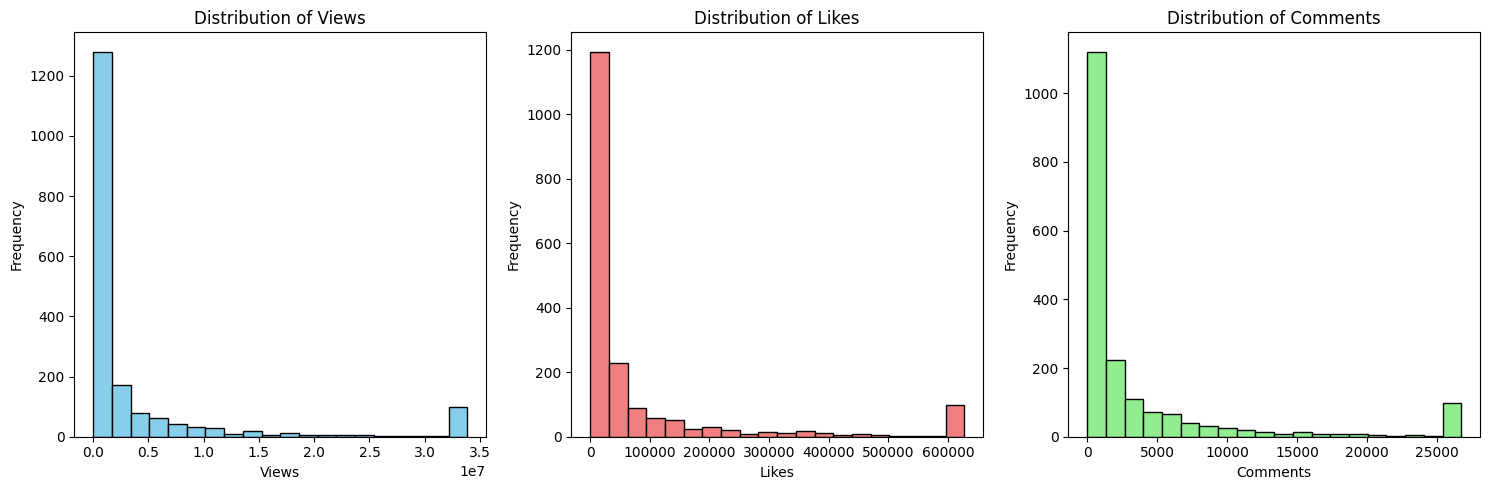

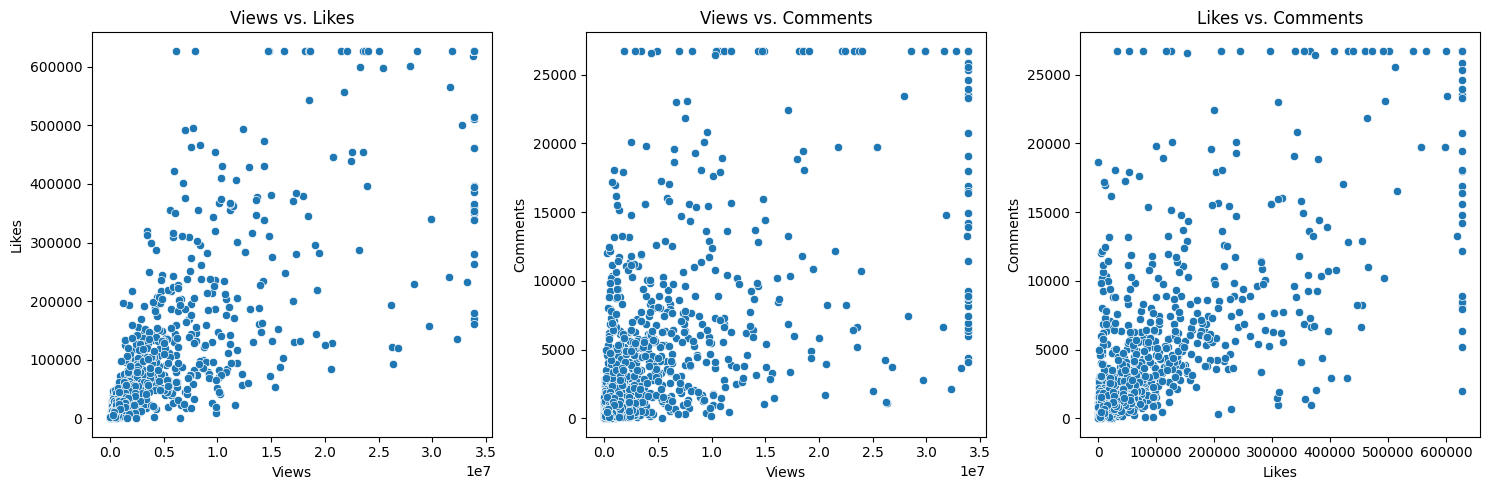

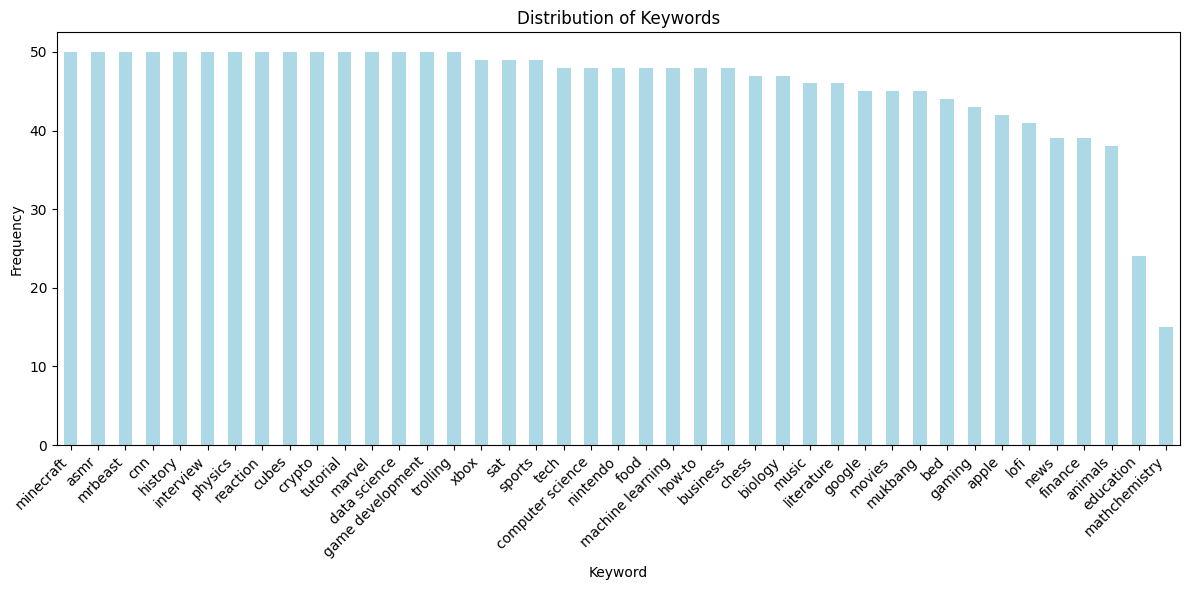

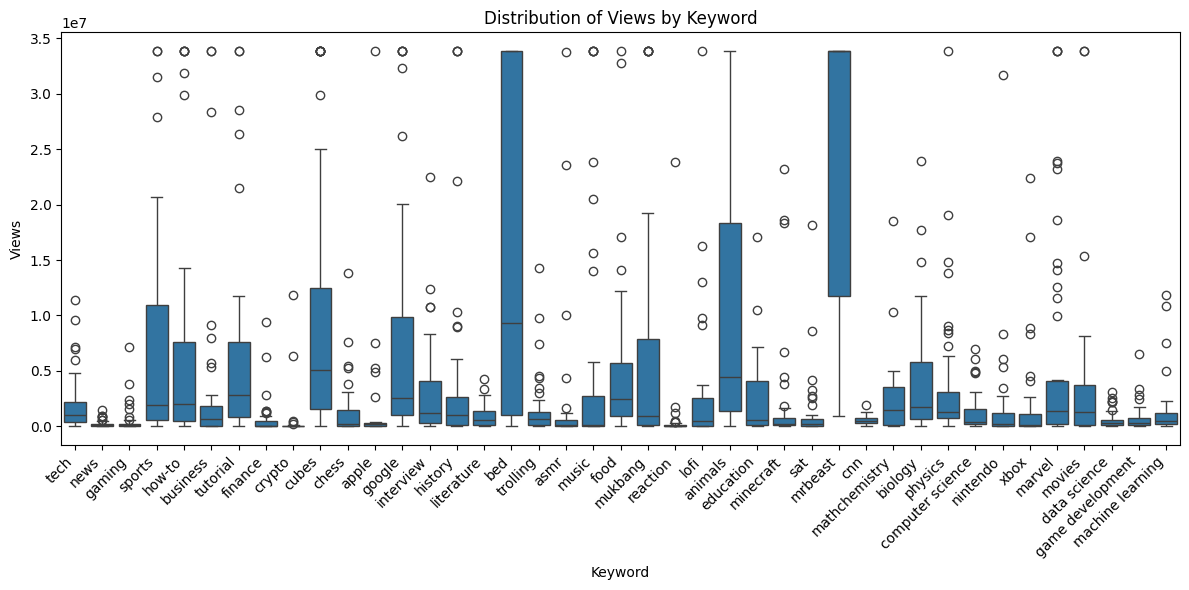

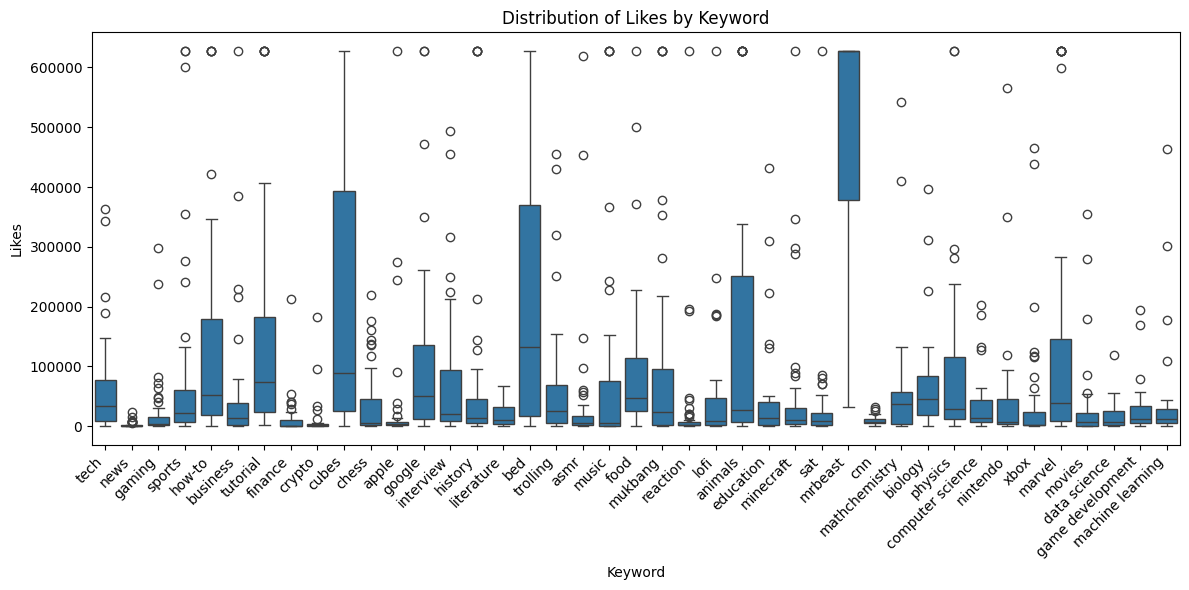

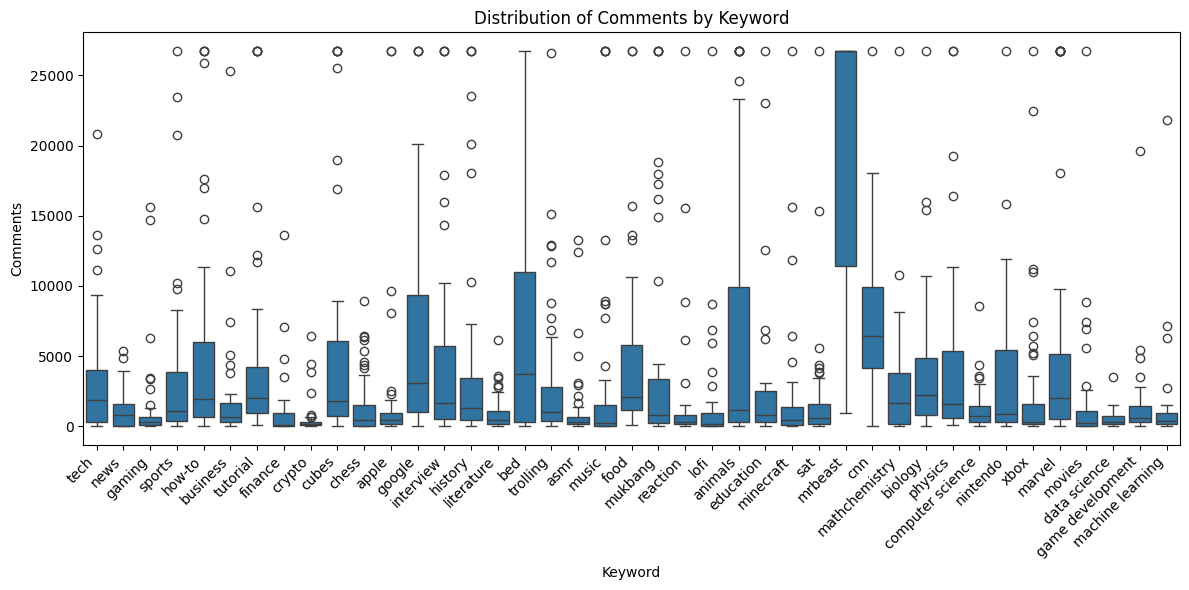

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical features
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(df['Views'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Views')
plt.ylabel('Frequency')
plt.title('Distribution of Views')

plt.subplot(1, 3, 2)
plt.hist(df['Likes'], bins=20, color='lightcoral', edgecolor='black')
plt.xlabel('Likes')
plt.ylabel('Frequency')
plt.title('Distribution of Likes')

plt.subplot(1, 3, 3)
plt.hist(df['Comments'], bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('Comments')
plt.ylabel('Frequency')
plt.title('Distribution of Comments')
plt.tight_layout()
plt.show()


# Scatter plots for numerical features
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='Views', y='Likes', data=df)
plt.xlabel('Views')
plt.ylabel('Likes')
plt.title('Views vs. Likes')

plt.subplot(1, 3, 2)
sns.scatterplot(x='Views', y='Comments', data=df)
plt.xlabel('Views')
plt.ylabel('Comments')
plt.title('Views vs. Comments')

plt.subplot(1, 3, 3)
sns.scatterplot(x='Likes', y='Comments', data=df)
plt.xlabel('Likes')
plt.ylabel('Comments')
plt.title('Likes vs. Comments')

plt.tight_layout()
plt.show()


# Bar chart for 'Keyword'
keyword_counts = df['Keyword'].value_counts()
plt.figure(figsize=(12, 6))
keyword_counts.plot(kind='bar', color='lightblue')
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.title('Distribution of Keywords')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Combined plot (box plot) for Views, Likes, and Comments by Keyword
plt.figure(figsize=(12, 6))
sns.boxplot(x='Keyword', y='Views', data=df)
plt.xlabel('Keyword')
plt.ylabel('Views')
plt.title('Distribution of Views by Keyword')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Keyword', y='Likes', data=df)
plt.xlabel('Keyword')
plt.ylabel('Likes')
plt.title('Distribution of Likes by Keyword')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Keyword', y='Comments', data=df)
plt.xlabel('Keyword')
plt.ylabel('Comments')
plt.title('Distribution of Comments by Keyword')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Top 10 Videos by View Count:
                                               Title         Views  \
0  El Chombo - Dame Tu Cosita feat. Cutty Ranks (...  4.034122e+09   
1           Martin Garrix - Animals (Official Video)  1.582263e+09   
2  The Weeknd - Save Your Tears (Official Music V...  9.154571e+08   
3          Maroon 5 - Animals (Official Music Video)  8.264238e+08   
4  Powfu - death bed (coffee for your head) (Offi...  5.247098e+08   
5           One Direction - History (Official Video)  4.343522e+08   
6  PIKOTARO - PPAP (Pen Pineapple Apple Pen) (Lon...  4.254781e+08   
7        Glass Animals - Heat Waves (Official Video)  3.781645e+08   
8      Young Money - Bed Rock (Official Music Video)  3.219776e+08   
9                      Rihanna - California King Bed  3.085010e+08   

        Likes  Comments  like_view_ratio  
0  16445558.0  732818.0         0.004077  
1  11025176.0  335455.0         0.006968  
2   6823113.0  270948.0         0.007453  
3   5743875.0  178361.0     

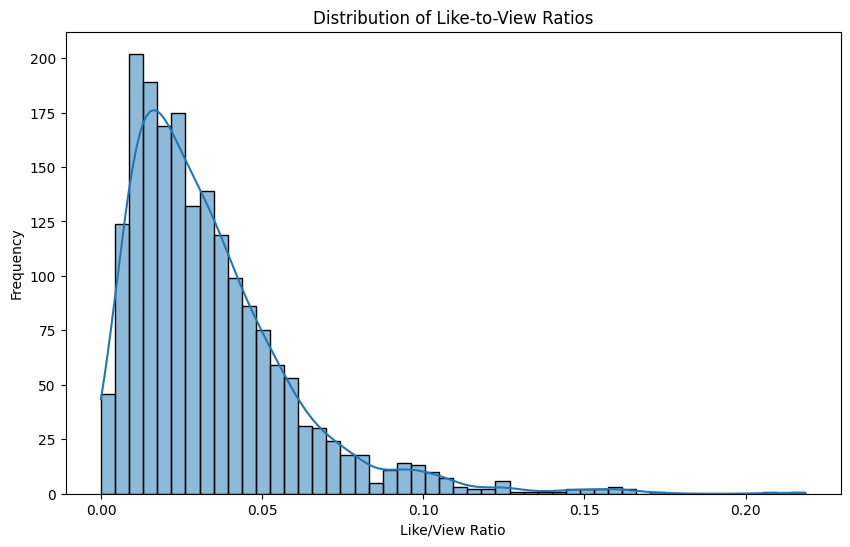

In [7]:
# Import libraries
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("videos-stats.csv")

# Preprocessing
df['Published At'] = pd.to_datetime(df['Published At'], errors='coerce')
df.dropna(subset=['Views', 'Likes', 'Comments'], inplace=True)
df['Views'] = pd.to_numeric(df['Views'], errors='coerce')
df['Likes'] = pd.to_numeric(df['Likes'], errors='coerce')
df['Comments'] = pd.to_numeric(df['Comments'], errors='coerce')
df.drop_duplicates(inplace=True)

# Add like-to-view ratio
df['like_view_ratio'] = df['Likes'] / df['Views']

# Create in-memory SQLite database
conn = sqlite3.connect(':memory:')

# Store DataFrame as SQL table
df.to_sql("youtube_stats", conn, index=False, if_exists="replace")

# Run SQL Query: Top 10 videos by view count
query_top_views = """
SELECT Title, Views, Likes, Comments, like_view_ratio
FROM youtube_stats
ORDER BY Views DESC
LIMIT 10
"""
top_views = pd.read_sql_query(query_top_views, conn)
print("Top 10 Videos by View Count:")
print(top_views)

# Run SQL Query: Videos with highest like/view ratio
query_top_ratio = """
SELECT Title, Views, Likes, like_view_ratio
FROM youtube_stats
WHERE Views > 100000
ORDER BY like_view_ratio DESC
LIMIT 10
"""
top_ratios = pd.read_sql_query(query_top_ratio, conn)
print("\nTop 10 Videos by Like-to-View Ratio:")
print(top_ratios)

# Optional: visualize like-to-view ratio distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['like_view_ratio'], bins=50, kde=True)
plt.title('Distribution of Like-to-View Ratios')
plt.xlabel('Like/View Ratio')
plt.ylabel('Frequency')
plt.show()
